In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.chdir("../")

In [2]:
df = pd.read_csv("csv/ヨルシカ_20231119.csv")

# 単語の一致率

In [3]:
MATCHED_RATE_A = "matched_rate_A"
MATCHED_RATE_S = "matched_rate_S"

df1 = df.dropna(subset=["word_count_A"])

df1[MATCHED_RATE_A] = df1["matched_word_count_A"] / df1["word_count_A"]
df1[MATCHED_RATE_S] = df1["matched_word_count_S"] / df1["word_count_S"]

x_max_wmr = df1[MATCHED_RATE_A].max()
x_min_wmr = df1[MATCHED_RATE_A].min()
y_max_wmr = df1[MATCHED_RATE_S].max()
y_min_wmr = df1[MATCHED_RATE_S].min()

xy_max_wmr = max(x_max_wmr, y_max_wmr) + 0.05
xy_min_wmr = min(x_min_wmr, y_min_wmr) - 0.05

/tmp/ipykernel_85721/1809785369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[MATCHED_RATE_A] = df1["matched_word_count_A"] / df1["word_count_A"]
/tmp/ipykernel_85721/1809785369.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[MATCHED_RATE_S] = df1["matched_word_count_S"] / df1["word_count_S"]


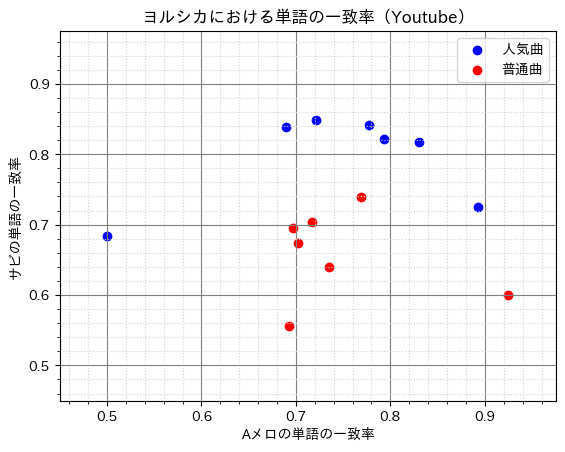

In [4]:
sort_by_youtube = df1.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
center = len(sort_by_youtube) // 2
pop_youtube = sort_by_youtube[:center]
unpop_youtube = sort_by_youtube[center:]

plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=unpop_youtube, color='red', label='普通曲')

plt.title("ヨルシカにおける単語の一致率（Youtube）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

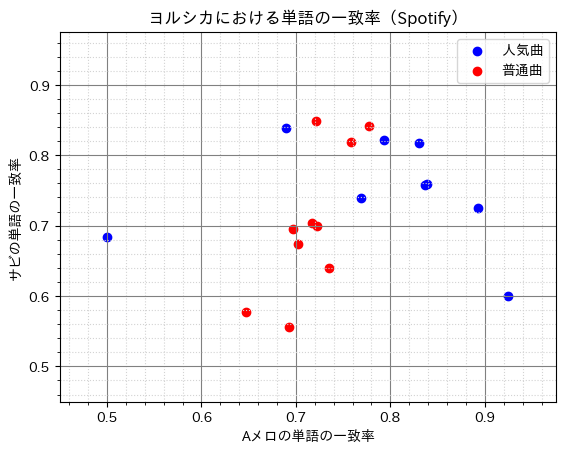

In [5]:
sort_by_spotify = df1.dropna(subset=["spotify_id"]).sort_values("spotify_popularity", ascending=False)
center = len(sort_by_spotify) // 2
pop_spotify = sort_by_spotify[:center]
unpop_spotify = sort_by_spotify[center:]

plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=MATCHED_RATE_A, y=MATCHED_RATE_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("ヨルシカにおける単語の一致率（Spotify）")
plt.xlabel("Aメロの単語の一致率")
plt.ylabel("サビの単語の一致率")
plt.legend()
plt.xlim(xy_min_wmr, xy_max_wmr)
plt.ylim(xy_min_wmr, xy_max_wmr)
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

# 木構造の類似度

In [6]:
TREE_SIMILARITY_A = "tree_similarity_A"
TREE_SIMILARITY_S = "tree_similarity_S"

df2 = df1 = df.dropna(subset=["subtree_combination_count_A", "subtree_combination_count_S"])

df2[TREE_SIMILARITY_A] = df2["matched_subtree_count_A"] / df2["subtree_combination_count_A"]
df2[TREE_SIMILARITY_S] = df2["matched_subtree_count_S"] / df2["subtree_combination_count_S"]

x_max_ts = df2[TREE_SIMILARITY_A].max()
x_min_ts = df2[TREE_SIMILARITY_A].min()
y_max_ts = df2[TREE_SIMILARITY_S].max()
y_min_ts = df2[TREE_SIMILARITY_S].min()

xy_max_ts = max(x_max_ts, y_max_ts) + 0.01
xy_min_ts = min(x_min_ts, y_min_ts) - 0.01

/tmp/ipykernel_85721/1246983762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[TREE_SIMILARITY_A] = df2["matched_subtree_count_A"] / df2["subtree_combination_count_A"]
/tmp/ipykernel_85721/1246983762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[TREE_SIMILARITY_S] = df2["matched_subtree_count_S"] / df2["subtree_combination_count_S"]


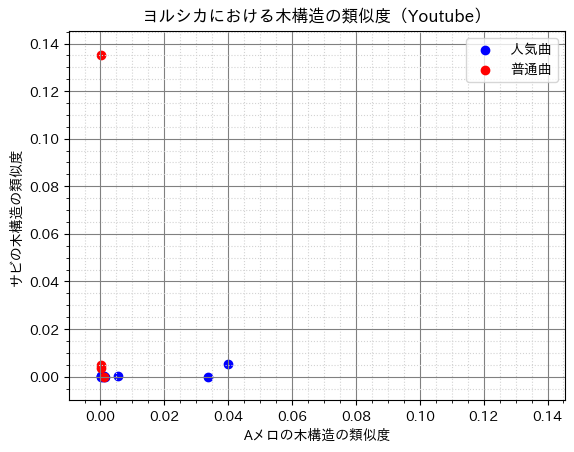

In [7]:
sort_by_youtube = df2.dropna(subset=["youtube_url"]).sort_values("youtube_play_times", ascending=False)
center == len(sort_by_youtube) // 2
pop_youtube = sort_by_youtube[:center]
unpop_youtube = sort_by_youtube[center:]

plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_youtube, color='red', label='普通曲')

plt.title("ヨルシカにおける木構造の類似度（Youtube）")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(xy_min_ts, xy_max_ts)
plt.ylim(xy_min_ts, xy_max_ts)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

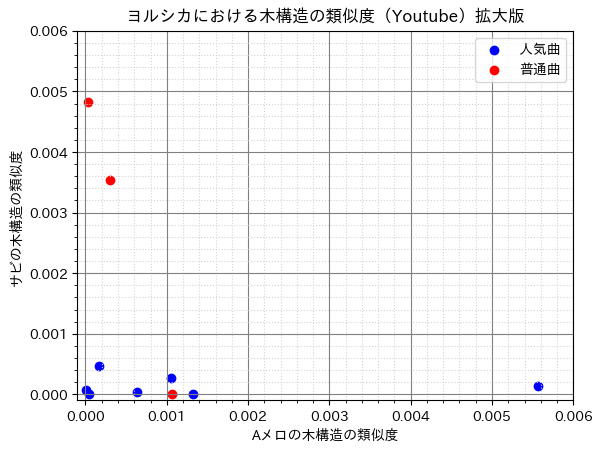

In [8]:
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_youtube, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_youtube, color='red', label='普通曲')
plt.title("ヨルシカにおける木構造の類似度（Youtube）拡大版")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(-0.0001, 0.006)
plt.ylim(-0.0001, 0.006)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

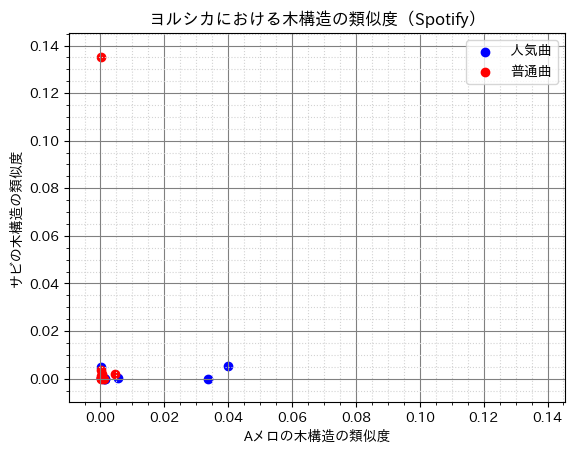

In [9]:
sort_by_spotify = df2.dropna(subset=["spotify_id"]).sort_values("spotify_popularity", ascending=False)
center = len(sort_by_spotify) // 2
pop_spotify = sort_by_spotify[:center]
unpop_spotify = sort_by_spotify[center:]

plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("ヨルシカにおける木構造の類似度（Spotify）")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(xy_min_ts, xy_max_ts)
plt.ylim(xy_min_ts, xy_max_ts)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')

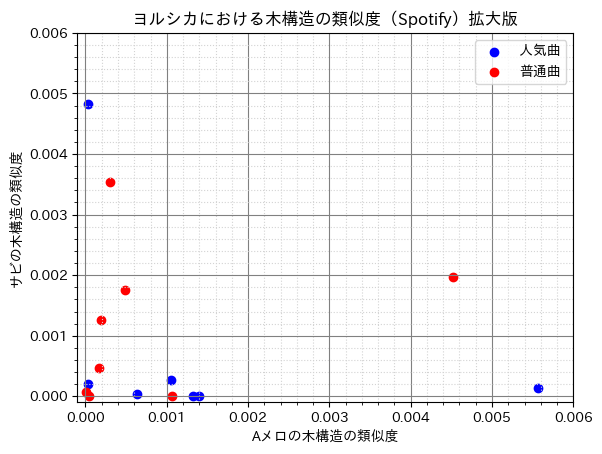

In [10]:
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=pop_spotify, color='blue', label='人気曲')
plt.scatter(x=TREE_SIMILARITY_A, y=TREE_SIMILARITY_S, data=unpop_spotify, color='red', label='普通曲')

plt.title("ヨルシカにおける木構造の類似度（Spotify）拡大版")
plt.xlabel("Aメロの木構造の類似度")
plt.ylabel("サビの木構造の類似度")
plt.xlim(-0.0001, 0.006)
plt.ylim(-0.0001, 0.006)
plt.legend()
plt.minorticks_on()
plt.grid(which='major', color='gray', linestyle='solid')
plt.grid(which='minor', color='lightgray', linestyle='dotted')